# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [53]:
df = pd.read_csv("/Users/rinagoldberg/Github/assignment-5/data/tidal_wetland_estuaries.csv")
df = df.replace(-9999, np.NaN)

In [54]:
df_east = df.loc[(df['coast'] == 'EAST'),:]
df_west = df.loc[(df['coast'] == 'WEST'),:]


In [55]:
df_east['soc_density'].describe()


count    52.000000
mean      0.077577
std       0.021260
min       0.004000
25%       0.067750
50%       0.077000
75%       0.091750
max       0.120000
Name: soc_density, dtype: float64

In [56]:
df_west['soc_density'].describe()

count    29.000000
mean      0.037793
std       0.018467
min       0.002000
25%       0.024000
50%       0.044000
75%       0.051000
max       0.080000
Name: soc_density, dtype: float64

In [57]:
stats.ttest_ind(df_east['soc_density'], df_west['soc_density'], alternative = 'two-sided', nan_policy = 'omit')


Ttest_indResult(statistic=8.45031778669312, pvalue=1.1530568956025485e-12)

In [58]:
print("The t test result was 8.45. This means that the soc_density on the East Coast is higher than the West Coast because the pvalue was much lower.")
print("I chose to use a 2-sample t-test because it allowed me to compare the means of 2 values. This allows me to see which soc_density is higher ")

The t test result was 8.45. This means that the soc_density on the East Coast is higher than the West Coast because the pvalue was much lower.
I chose to use a 2-sample t-test because it allowed me to compare the means of 2 values. This allows me to see which soc_density is higher 


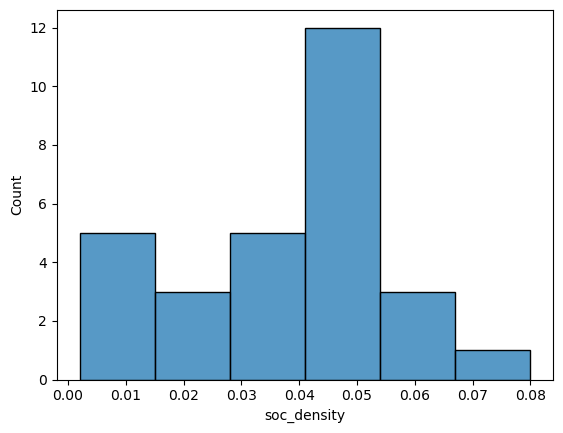

In [59]:
sns.histplot(df_west['soc_density'])
plt.show()

In [60]:
print("The data from the west coast is not normally distributed and there are many variables higher than the mean value")

The data from the west coast is not normally distributed and there are many variables higher than the mean value


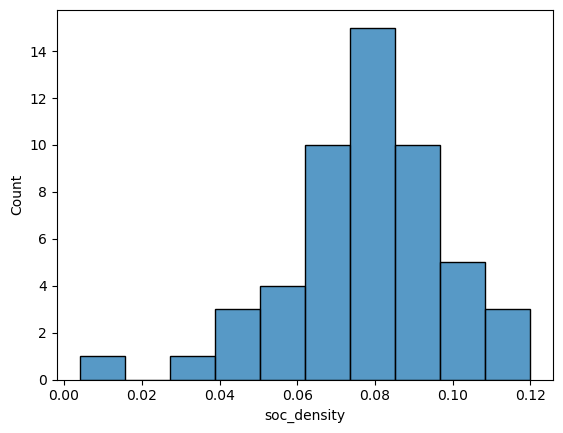

In [61]:
sns.histplot(df_east['soc_density'])
plt.show()

In [62]:
print("The data from the east coast is distributed because it centers around the mean value, which should be the highest number on the graph ")

The data from the east coast is distributed because it centers around the mean value, which should be the highest number on the graph 


## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

In [63]:
from utils import Linear_Reg_Diagnostic # do not change!
import statsmodels.formula.api as smf

In [64]:
df = df.replace(-9999, np.NaN)
df.columns

Index(['name', 'coast', 'estu_latitude', 'estu_longintude', 'estu_dep',
       'estu_perim', 'land_area', 'land_latitude', 'land_longitude',
       'population', 'tide_ht', 'estu_salinity', 'ocean_salinity_mean',
       'air_temp_mean', 'frost_days_per_yr', 'ocean_sst_mean',
       'ocean_diss_inorg_p', 'ocean_no3', 'tide_flow', 'mean_precip',
       'mean_temp', 'soc_density'],
      dtype='object')

In [65]:
model = smf.ols(formula = "ocean_salinity_mean ~ tide_ht + ocean_sst_mean + ocean_no3 + mean_precip", data = df).fit()
test = Linear_Reg_Diagnostic(model)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ocean_salinity_mean   R-squared:                       0.818
Model:                             OLS   Adj. R-squared:                  0.811
Method:                  Least Squares   F-statistic:                     122.5
Date:                 Mon, 08 May 2023   Prob (F-statistic):           2.14e-39
Time:                         21:08:03   Log-Likelihood:                -120.23
No. Observations:                  114   AIC:                             250.5
Df Residuals:                      109   BIC:                             264.1
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.5560      0.463     65.987      0.000      29.638      31.474
tide_ht            0.2658      0.095      2.800      0.006       0.078       0.454
ocean_sst_mean     0.2268      0.017     13.138      0.000       0.193       0.261
ocean_no3         -0.0720      0.092     -0.784      0.435      -0.254       0.110
mean_precip       -0.0010      0.000     -6.820      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        4.792   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.865
Skew:                          -0.484   Prob(JB):                       0.0878
Kurtosis:                       2.705   Cond. No.                     9.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
print("The variables I chose, which are tide_ht, ocean sst_meam, ocean no3 and mean precip, ")
print("The adjusted and R-Squared Values are 0.811 and 0.818 respectively. The R-Squared value of .818 means that the variables I chose can explain 81.8 percent of the variance in ocean salinity ")



The variables I chose, which are tide_ht, ocean sst_meam, ocean no3 and mean precip, 
The adjusted and R-Squared Values are 0.811 and 0.818 respectively. The R-Squared value of .818 means that the variables I chose can explain 81.8 percent of the variance in ocean salinity 


In [67]:
test.vif_table()

         Features  VIF Factor
4     mean_precip        1.05
1         tide_ht        1.87
2  ocean_sst_mean        2.69
3       ocean_no3        2.87
0       Intercept       48.43


In [68]:
print("The VIF values are under 5")

The VIF values are under 5


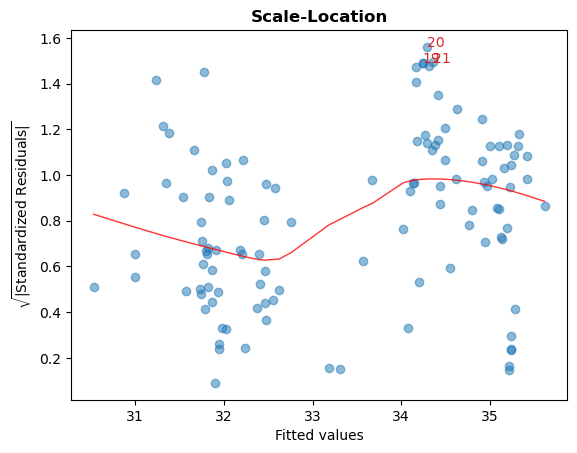

In [69]:
test.scale_location_plot()
plt.show()

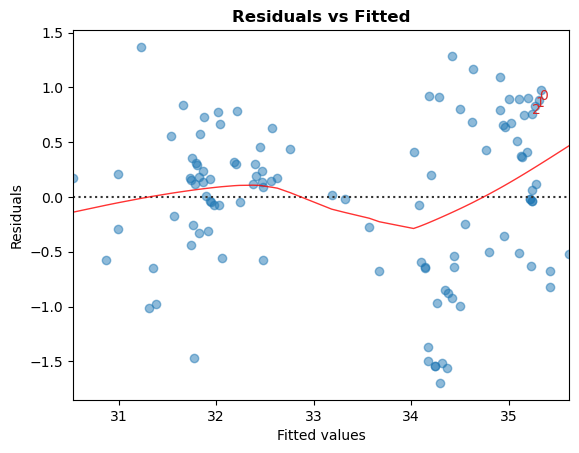

In [70]:
test.residual_plot()
plt.show()

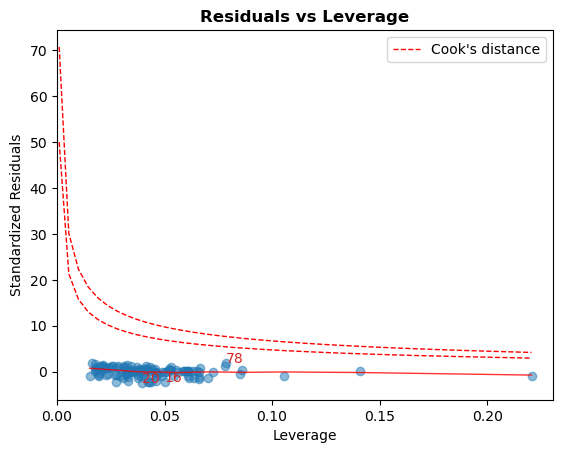

In [71]:
test.leverage_plot()
plt.show()


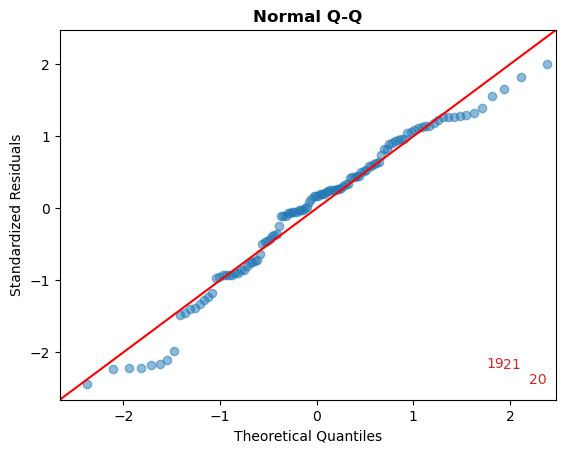

In [72]:
test.qq_plot()
plt.show()

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)

In [73]:
import pmdarima as pm
from pmdarima import auto_arima

In [74]:
from statsmodels.tsa.stattools import adfuller 

In [75]:
df2 = pd.read_csv("/Users/rinagoldberg/Github/assignment-5/data/coal-production.csv")
df2['year'] = pd.to_datetime(df2['year'], format = "%Y")
df2 = df2.set_index('year')
df2.head()

,electricity_prod
year,
1960-01-01,45.904345
1961-01-01,45.730794
1962-01-01,46.411172
1963-01-01,46.599523
1964-01-01,46.102588


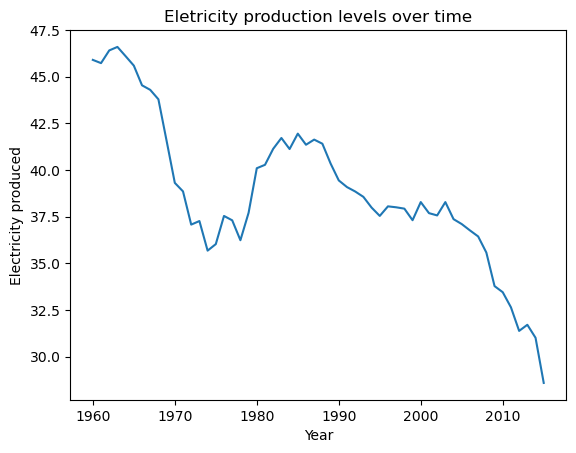

In [76]:
fig, ax = plt.subplots()
ax.plot(df2["electricity_prod"])
ax.set_xlabel("Year")
ax.set_ylabel("Electricity produced")
ax.set_title("Eletricity production levels over time")
plt.show()

In [77]:

def adf_print(time_series):
    adf_output = adfuller(time_series)
    stat = adf_output[0]
    pval = adf_output[1]
    print('ADF statistic:', stat)
    print('p-value', pval)
    return None

adf_print(df2)

print("Since the P value is large it can be assumed that it is not stationary")

ADF statistic: 1.872154432675824
p-value 0.9984818799941668
Since the P value is large it can be assumed that it is not stationary


In [78]:
auto_model = auto_arima(df2['electricity_prod'])
auto_model.summary()

/Users/rinagoldberg/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/rinagoldberg/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/rinagoldberg/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/rinagoldberg/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/rinagoldberg/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in r

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -71.684
Date:                Mon, 08 May 2023   AIC                            149.368
Time:                        21:08:09   BIC                            155.390
Sample:                             0   HQIC                           151.697
                                 - 56                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.140      6.074      0.000       0.574       1.121
ma.L1         -0.6020      0.230     -2.622      0.009      -1.052      -0.152
sigma2         0.7894      0.171      4.604      0.000       0.453       1.125
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.68   Prob(JB):                         0.51
Heteroskedasticity (H):               0.72   Skew:                             0.36
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
predict = auto_model.predict_in_sample()
predict = pd.Series(predict, index = df2.index)

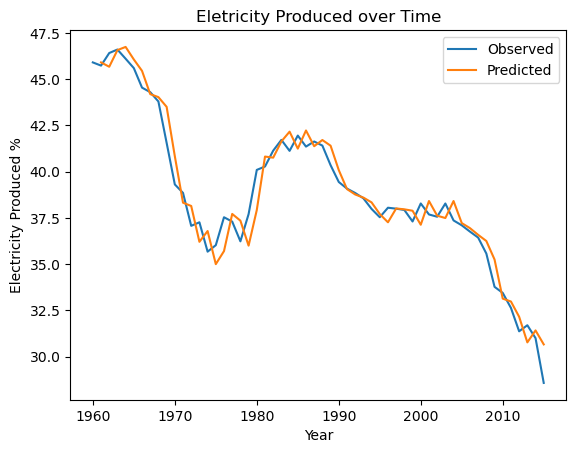

In [80]:
fig, ax = plt.subplots()
ax.plot(df2, label='Observed')
ax.plot(predict[1:], label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Produced %')
ax.set_title("Eletricity Produced over Time")
ax.legend()
plt.show()

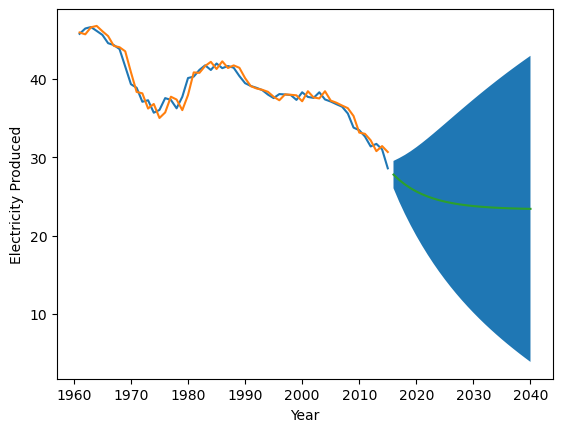

In [81]:
forecast, ci = auto_model.predict(25, return_conf_int=True)
future_dates = pd.date_range(df2.index[-1], periods = 26, freq='AS-JAN', inclusive = 'neither')

fig, ax = plt.subplots()
ax.plot(df2[1:], label='observed')
ax.plot(predict[1:], label = 'predicted')
ax.plot(future_dates,forecast, label='forecast')
ax.fill_between(future_dates, ci[:,0], ci[:,1])
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Produced')
ax.legend
plt.show()